# Week 2

**Code made for the course *Stochastic Processes: Data Analysis and Computer Simulation***

Made by Ricardo Miguel Leal Lopez.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
jtplot.style(ticks=True, grid=True, figsize=(15, 7))

In [2]:
#Normal distribution
def normal(x,mu,sigma):
    exp=np.exp(-0.5*((x-mu)/sigma)**2)
    normal=1/(sigma*np.sqrt(2*np.pi))
    return normal*exp

#Binomial distribution
def binomial(x,p,n):
    D=(factorial(n))/(factorial(x)*factorial(n-x))
    F=((1-p)**(n-x))*(p**x)
    return D*F

#Función para el factorial
def factorial(x):
    f=1
    if x==0:
        return f
    else:
        for i in range(1,x+1):
            f=f*i
    return f #Se regresa f, que seria el factorial.

## Primer problema.

Encuentra la media $\mu$ y la desviación $\sigma$ para generar la gráfica mostrada usando una distribución estandar.

In [3]:
P=[]  #La probabilidad.
Pn=[] #La otra probabilidad.
x=[]  #La distancia.

n=-5
#Hacemos un ciclo while para la muestra. Usaremos la distribución estandar y otra nueva.
while n<5:
    P.append(normal(n,0,1))
    Pn.append(normal(n,2,0.5))
    x.append(n)
    n+=0.1

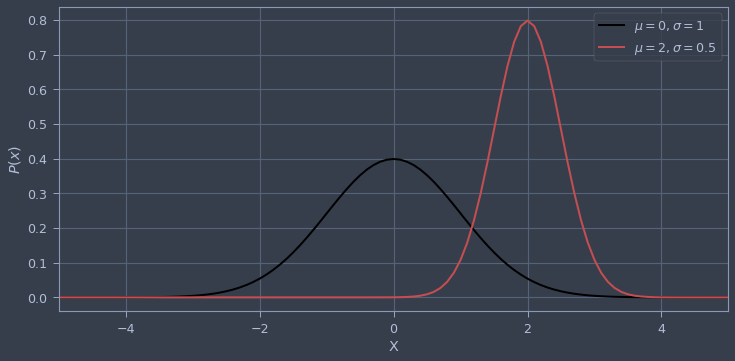

In [4]:
plt.figure()
plt.plot(x,P,'black',lw=2,label='$\mu=0,\sigma=1$')
plt.plot(x,Pn,'r',lw=2,label='$\mu=2,\sigma=0.5$')
plt.plot()
plt.xlabel('X')
plt.xlim(-5,5)
plt.ylabel('$P(x)$')
plt.legend()

## Segundo problema.

Ahora, utilizando la distribución binomial. Encuentra tres distintas gráficas con tres distintos parametros.

In [5]:
P1=[]; P2=[]; P3=[] #Generamos las tres funciones de probabilidad.
x=[] #En este caso, este sera nuestro nuevo x.

n=0
while n<=100:
    P1.append(binomial(n,0.5,100))
    P2.append(binomial(n,0.2,100))
    P3.append(binomial(n,0.1,500))
    x.append(n)
    n+=1

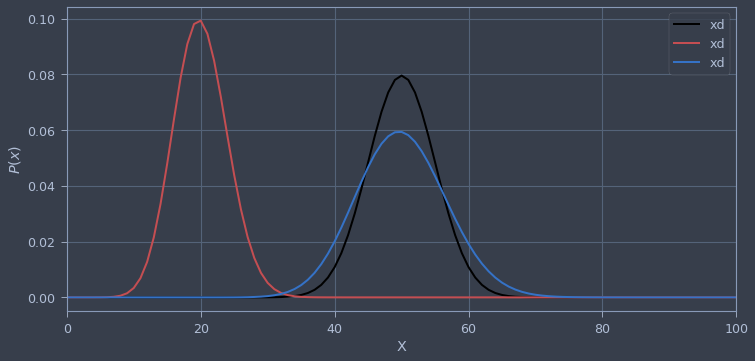

In [6]:
plt.figure()
plt.plot(x,P1,'black',lw=2,label='xd')
plt.plot(x,P2,'r',lw=2,label='xd')
plt.plot(x,P3,'b',lw=2,label='xd')
plt.plot()
plt.xlabel('X')
plt.xlim(0,100)
plt.ylabel('$P(x)$')
plt.legend()

## Tercer problema

Escribe un código que dibuje correctamente $10$,$000$ numeros aleatorios, utilizando la distribución normal con una media de $\mu=2$ y una varianza de $4$.

In [7]:
ave=2
std=4

N=10000
np.random.seed(0)
X=np.random.normal(ave,std,N)

#Ahora comprobamos que sean 10,000 numeros. Creamos una serie con Pandas para eso.
S=pd.DataFrame(data=X, columns={'Valores aleatorios.'})
S

,Valores aleatorios.
0,9.056209
1,3.600629
2,5.914952
3,10.963573
4,9.470232
...,...
9995,-5.237127
9996,2.169435
9997,4.067489
9998,1.868317


## Cuarto problema.

Encuentra la gráfica para una distribución gaussiana aleatoria con $N=10,000$, $\mu=2$ y $\sigma=4$.

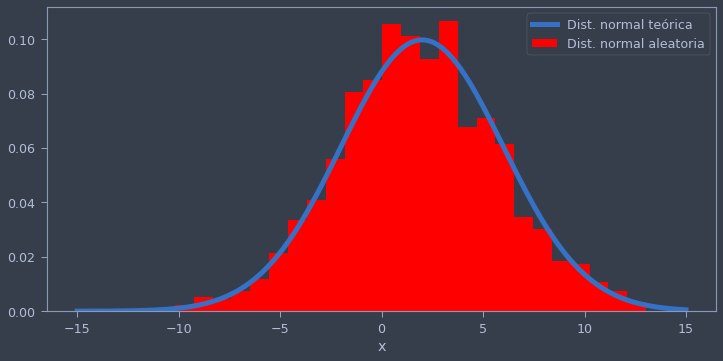

In [8]:
#Primero generamos la distribución aleatoria.
mu=2; sigma=4 #Los valores de la media y la desviación estandar.
x0=-15; xf=15 #Los limites de nuestra distribución.
x=[]; Dist=[] #Iniciamos ambos repositorios de valores.

n=x0 #Iniciamos la variable para el ciclo while.
while n<=xf:
    Dist.append(normal(n,mu,sigma))
    x.append(n)
    n+=0.1
    
#-------------------------------------------#
#Ahora, generamos la distribución aleatoria.#
#-------------------------------------------#
N=1000
np.random.seed(0)
X=np.random.normal(mu,sigma,N)

fig=plt.figure()
plt.hist(X,bins=25,density=True,color='red',label='Dist. normal aleatoria')
plt.plot(x,Dist,'b',lw=5,label='Dist. normal teórica')
plt.xlabel('x')
plt.legend()
plt.grid(False)

## Quinto problema.

Ahora, usaremos el teorema del limite central. Utilizando $p=0.5$ y $m=1,000$, ¿cual gráfica es la más cercana a los resultados?

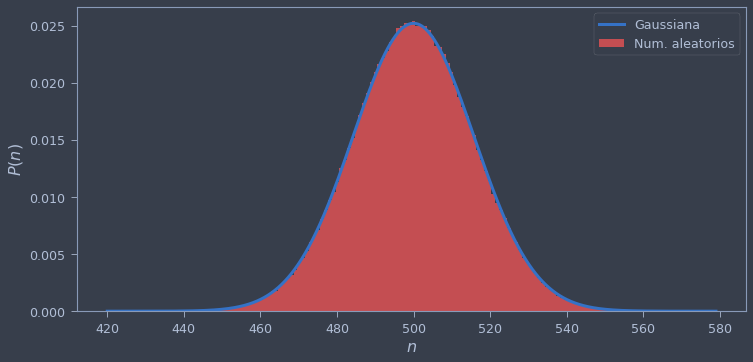

In [9]:
p=0.5     #La probabilidad de que caiga una de as dos caras de una moeda.
m=1000    #El numero de muestras, es decir, de monedas.
N=1000000 #El numero de experimentos a realizar.

mu=m*p #El promedio.
sigma=np.sqrt(m*p*(1-p)) #El valor central.

np.random.seed(0) #La semilla inicial para los valores aleatorios.
X=np.random.binomial(m,p,N) #Los numeros aleatorios.
nmin=np.int(mu-sigma*5)
nmax=np.int(mu+sigma*5)
nbin=nmax-nmin+1

x=np.arange(nmin,nmax,0.01/sigma)
y=np.exp(-(x-mu)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)


#Ahora, graficaremos. Hacemos un histograma de lo obtenido.
plt.figure()
plt.hist(X,range=[nmin,nmax],bins=nbin,density=True,color='r',label='Num. aleatorios')
plt.plot(x,y,color='b',lw=3,label='Gaussiana')
plt.xlabel(r'$n$',fontsize=16)
plt.ylabel(r'$P(n)$',fontsize=16)
plt.legend()
plt.grid(False)

## Sexto problema.

Ahora, desconociendo la probabilidad, usaremos una suma de $m$ numeros aleatorios uniformes. Entonces, si $m=4$, ¿cual es la gráfica resultante?

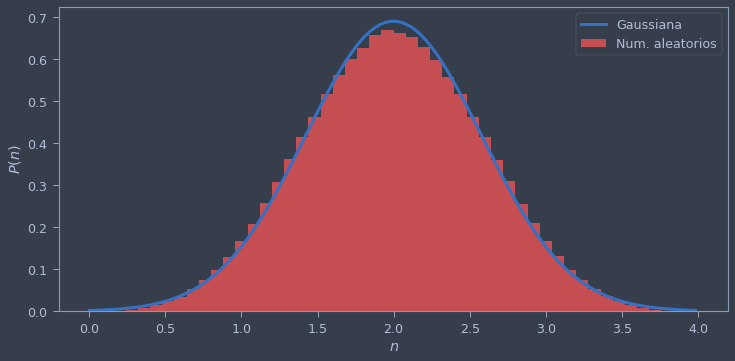

In [10]:
m=4
N=1000000

mu=m/2
sigma=np.sqrt(m/12)

np.random.seed(0)
X=np.zeros(N)
for i in range(0,N):
    X[i]=np.sum(np.random.rand(m))
nmin=np.int(mu-sigma*5)
nmax=np.int(mu+sigma*5)

x=np.arange(nmin,nmax,0.01/sigma)
y=normal(x,mu,sigma)

plt.figure()
plt.hist(X,range=[nmin,nmax],bins=50,density=True,color='r',label='Num. aleatorios')
plt.plot(x,y,lw=3,color='b',label='Gaussiana')
plt.xlabel('$n$')
plt.ylabel('$P(n)$')
plt.legend()
plt.grid(False)

## Septimo problema.

Ahora, usaremos un ejemplo de caminata aleatoria. En este caso, tratamos a un hombre borracho donde puede dar un paso para delante $(n_+)$ o un paso para atras $(n_-)$. Esto se repetira un total de $M$ veces, donde sabemos que $M$ seran todos los pasos que de el hombre borracho, es decir $M=n_++n_-$. 

Si buscamos saber la cantidad de distancia recorrida por el hombre, tenemos que $l=n_+-n_-$. Entonces, las ecuaciones para saber cuales son los pasos dados por el hombre son las siguientes:

\begin{equation}
\begin{array}{cc}
n_+=\frac{m+l}{2} & n_-=\frac{m-l}{2}
\end{array}\end{equation}


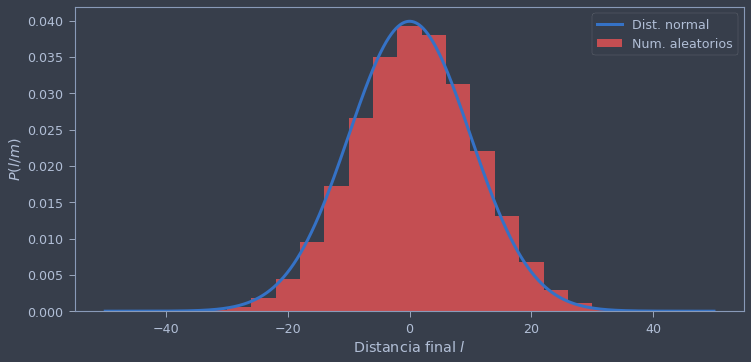

In [12]:
#Ahora, usaremos un código similar al del problema 5.
p=0.5 #La probabilidad de que camine hacia delante o hacia atras.
M=100 #El numero total de pasos dados por el hombre.
N=1000000 #El numero de caminantes aleatorios, en este caso, son 1x10^6 borrachos.

mu=M*(2*p-1) #El promedio para nuestra ubicación l despues de M pasos.
sigma=np.sqrt(4*M*p*(1-p)) #La desviación estandar.

L=np.zeros(N) #Un arreglo de N ceros para la posición del caminante.
np.random.seed(0) #La semilla aleatoria.
for i in range(0,N): 
    paso=np.random.choice([-1,1],M)
    L[i]=np.sum(paso) #Generamos la posicion para un paso i.
nmin=np.int(mu-sigma*5)
nmax=np.int(mu+sigma*5)
nbin=np.int((nmax-nmin)/4)

#Ahora, comparamos con una distribución normal. Entonces, creamos un arreglo de x
x=np.arange(nmin,nmax,0.001/sigma)
y=normal(x,mu,sigma) #Llamamos nuestra función con la ecuación de la distribución normal.

#Ahora, graficamos.
plt.figure()
plt.hist(L,range=[nmin,nmax],bins=nbin,color='r',label='Num. aleatorios',density=True)
plt.plot(x,y,lw=3,color='b',label='Dist. normal')
plt.xlabel('Distancia final $l$')
plt.ylabel('$P(l/m)$')
plt.legend()
plt.grid(False)